## Group Project Report: Predicting Heart Disease Using knn classification
Nethkini Liyanage - Charlotte Du - Andrew Young Liu - Vivian Khong

In [1]:
#load packages
library(tidyverse)
library(tidymodels)
library(dplyr)
library(gridExtra)

# set the seed
set.seed(1)


Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## Introduction:
Heart disease pertains to be one of the major causes of death (1 in 5) in America and many other countries. Factors including cholesterol, blood pressure, and blood sugar levels, among many others, are critical indicators of heart disease risk and contribute to narrowing arteries and reducing blood flow to the heart, increasing the chances of heart attacks and other cardiovascular complications. Managing these levels is crucial in preventing heart disease.  Using medical equipment such as X-rays and ECGs is too costly and is not readily available to be used across the world. The “Heart Disease” dataset donated by researchers at the Department of Medicine, Veterans Administration Medical Center, Long Beach California in 1988 includes 14 attributes and a target variable indicating the presence or absence of heart disease. The dataset contains data from patient test groups from Switzerland, America, and Hungary. This project utilizes the database from Cleveland, Ohio to determine if cases of heart disease can be accurately classified using  maximum heart rate achieved during exercise (thalach), ST depression induced by exercise relative to rest (oldpeak), and number of major vessels (ca). 

## Methods & Results

### Loading Data into R

In [2]:
# create readable column name tibble
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "heart_disease_presence")
# read the data into R
cleveland_data <- read.csv("processed.cleveland.data", header = FALSE,, col.names = column_names)

# view the first few rows of the data and have a glipmse
head(cleveland_data)
glimpse(cleveland_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Rows: 303
Columns: 14
$ age                    <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56,…
$ sex                    <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,…
$ cp                     <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3,…
$ trestbps               <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 14…
$ chol                   <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 20…
$ fbs                    <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,…
$ restecg                <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0,…
$ thalach                <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 15…
$ exang                  <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,…
$ oldpeak                <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.…
$ slope                  <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1,…
$ ca                     <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0"…
$ thal            

In [3]:
# convert 0 to 'no' and 1-3 to 'yes' in a new column
cleveland_data$heart_disease_presence <- ifelse(cleveland_data$heart_disease_presence == 0, 'no', 'yes')

# convert the column types
cleveland_data <- mutate(cleveland_data, ca = as.numeric(ca), 
    heart_disease_presence = as.factor(heart_disease_presence))

# see first 6 rows to check the effect
head(cleveland_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,no
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,yes
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,yes
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,no
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,no
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,no


### Cleaning and Wrangling (training) data   to edit once eric response

In [4]:
# summarize the number of observations that are "NA"
na_count <- cleveland_data |>
  summarise(
    Total_Missing_Data = sum(rowSums(is.na(cleveland_data)))
  )
na_count

Total_Missing_Data
<dbl>
4


In [5]:
# delete rows contain NA
cleveland_data <- na.omit(cleveland_data)

In [6]:
# this code block needed some change waiting on TA Eric's response. Dont edit.Ty

# summarize the number of observations that are "?"
question_mark__count <- data.frame(t(colSums(cleveland_data == "?")))
question_mark__count

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,0,0,2,0


In [7]:
# delete these rows with "?" and "NA"
cleveland_data <- filter(cleveland_data, thal != "?", ca != "?")

### Data Split and Summary Tables of Class Distribution

In [17]:
# split the data to 75% training and 25% testing
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = heart_disease_presence)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

# show the head of the traning data
head(cleveland_train)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,no
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,no
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,no
4,57,0,4,120,354,0,0,163,1,0.6,1,0,3.0,no
5,56,0,2,140,294,0,2,153,0,1.3,2,0,3.0,no
6,44,1,2,120,263,0,0,173,0,0.0,1,0,7.0,no


In [12]:
# Summary table with count of observations, mean of predictors
summary_table <- cleveland_train |>
  summarise(
    Count_Yes = sum(heart_disease_presence == "yes"),
    Count_No = sum(heart_disease_presence == "no"),
    Mean_trestbps = mean(trestbps),
    Mean_thalach = mean(thalach),
    Mean_oldpeak = mean(oldpeak),
    Mean_chol = mean(chol),
    Mean_ca = mean(ca),
  )

# To view the table
summary_matrix <- as.matrix(summary_table)
summary_matrix

Count_Yes,Count_No,Mean_trestbps,Mean_thalach,Mean_oldpeak,Mean_chol,Mean_ca
102,120,132.3604,149.6216,1.058108,246.8649,0.6666667


### Visualizations of Potential Predictor Variables

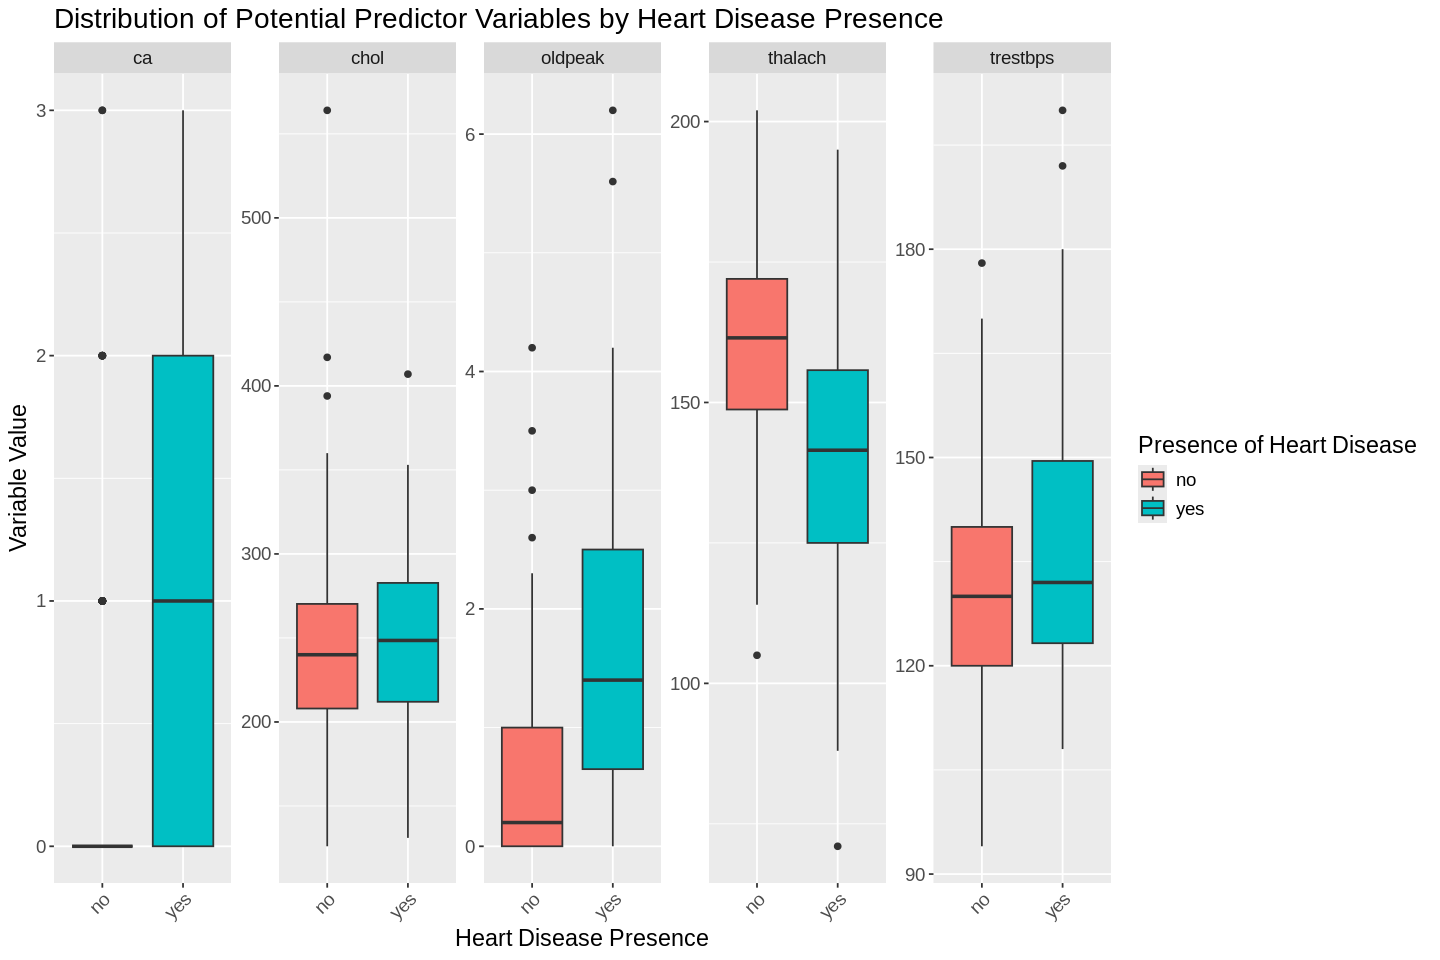

In [13]:
# box plots visualization of the data
options(repr.plot.width=12, repr.plot.height=8)

long_data <- cleveland_train |>
  pivot_longer(cols = c(trestbps, thalach, oldpeak, chol, ca), names_to = "variable", values_to = "value")

ggplot(long_data, aes(x = heart_disease_presence, y = value, fill = heart_disease_presence)) +
  geom_boxplot() +
  facet_wrap(~variable, scales = 'free', ncol = 5) +
  labs(x = "Heart Disease Presence", y = "Variable Value", fill = "Presence of Heart Disease", title = "Distribution of Potential Predictor Variables by Heart Disease Presence") +
  theme(text = element_text(size = 14), axis.text.x = element_text(angle = 45, hjust = 1))

## Classification Data Analysis

### Predictors Selection and its Reasoning

By observing the barplots side by side, we decided that the variables 'ca,' 'oldpeak,' and 'thalach' will be selected as predictors for further analysis, as they exhibit statistically significant variation in the boxplot and are unlikely due to sampling variability when comparing different categories of heart condition presence.

### Preprocess the data

In [19]:
# scale and center data
cleveland_recipe <- recipe(heart_disease_presence ~ ca + chol + oldpeak, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

### Tuning the classifier

In [16]:
# create K-nearest neighbor model specification with tune
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# 5-fold cross-validation
cleveland_vfold <- vfold_cv(cleveland_train, v = 5, strata = heart_disease_presence)

# create a Ks' tibble
grid_vals <- tibble(neighbors = seq(1, 20))

# workflow analysis combines recipe and model
accuracy_results <- workflow() |>
  add_recipe(cleveland_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = cleveland_vfold, grid = grid_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")
accuracy_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7208081,5,0.02262232,Preprocessor1_Model01
2,accuracy,binary,0.7162626,5,0.02158900,Preprocessor1_Model02
3,accuracy,binary,0.7208081,5,0.02048937,Preprocessor1_Model03
4,accuracy,binary,0.7208081,5,0.02048937,Preprocessor1_Model04
5,accuracy,binary,0.7568687,5,0.02362622,Preprocessor1_Model05
6,accuracy,binary,0.7568687,5,0.02362622,Preprocessor1_Model06
7,accuracy,binary,0.7387879,5,0.02692369,Preprocessor1_Model07
8,accuracy,binary,0.7387879,5,0.02692369,Preprocessor1_Model08
9,accuracy,binary,0.7432323,5,0.02693894,Preprocessor1_Model09


### Ploting the accuracy vs k

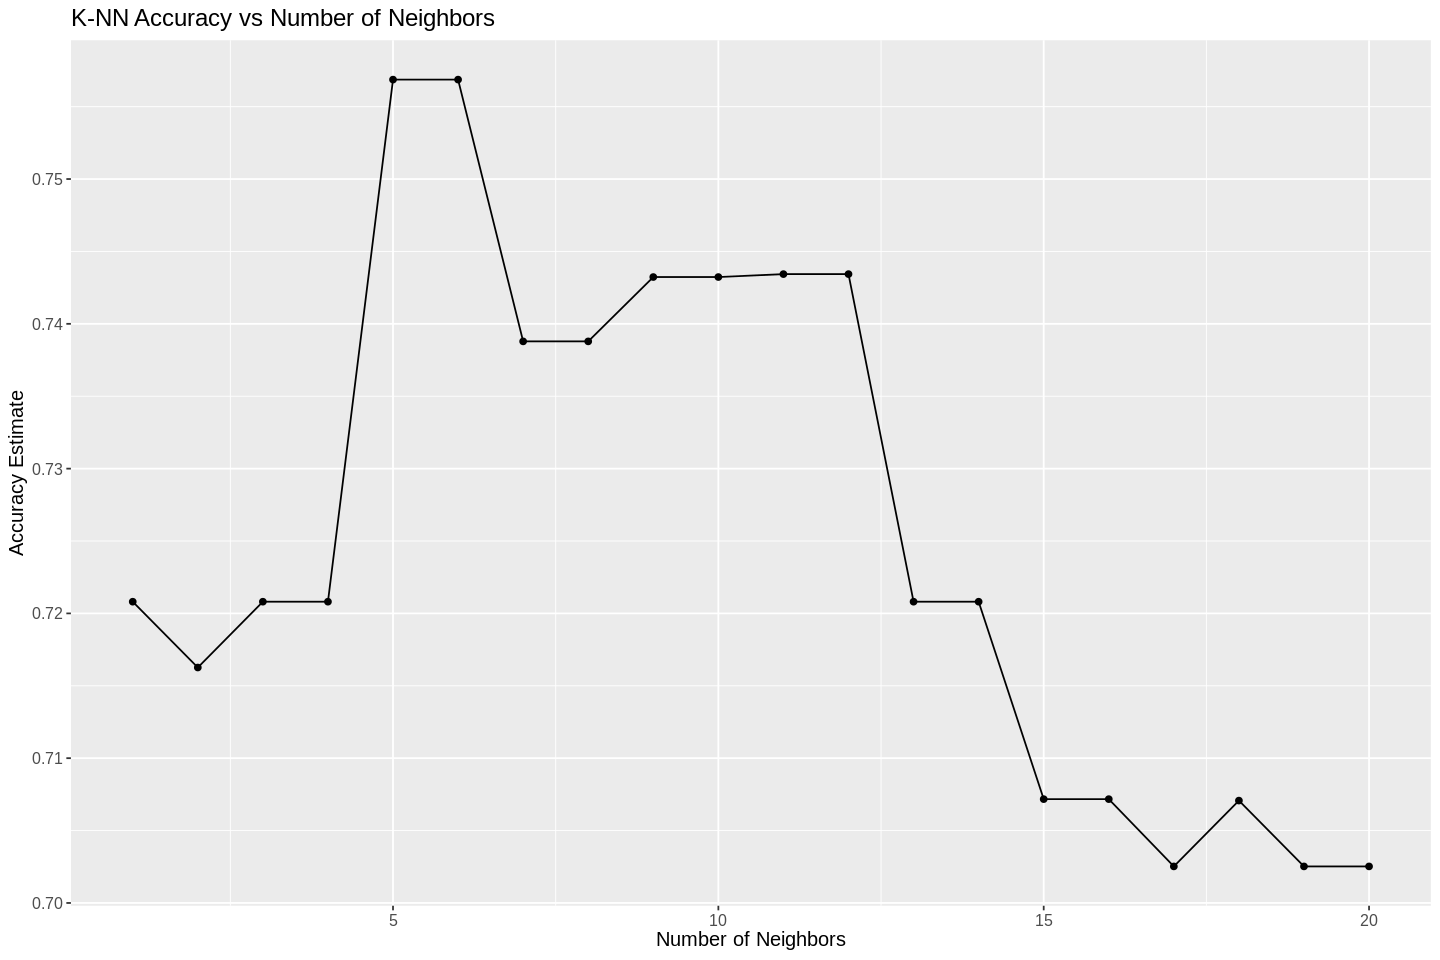

In [22]:
accuracy_plot <- ggplot(accuracy_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of Neighbors", y = "Accuracy Estimate", title = "K-NN Accuracy vs Number of Neighbors") +
  theme(text = element_text(size = 12))
accuracy_plot

### Obtain the Number of Neighbours with the Highest Accuracy

In [24]:
best_k <- accuracy_results |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)
best_k

[1] 5

          Truth
Prediction no yes
       no  31  12
       yes  9  23

Metric,Value
<chr>,<dbl>
Accuracy,0.7297297
Precision,0.7500000
Recall,0.6176471


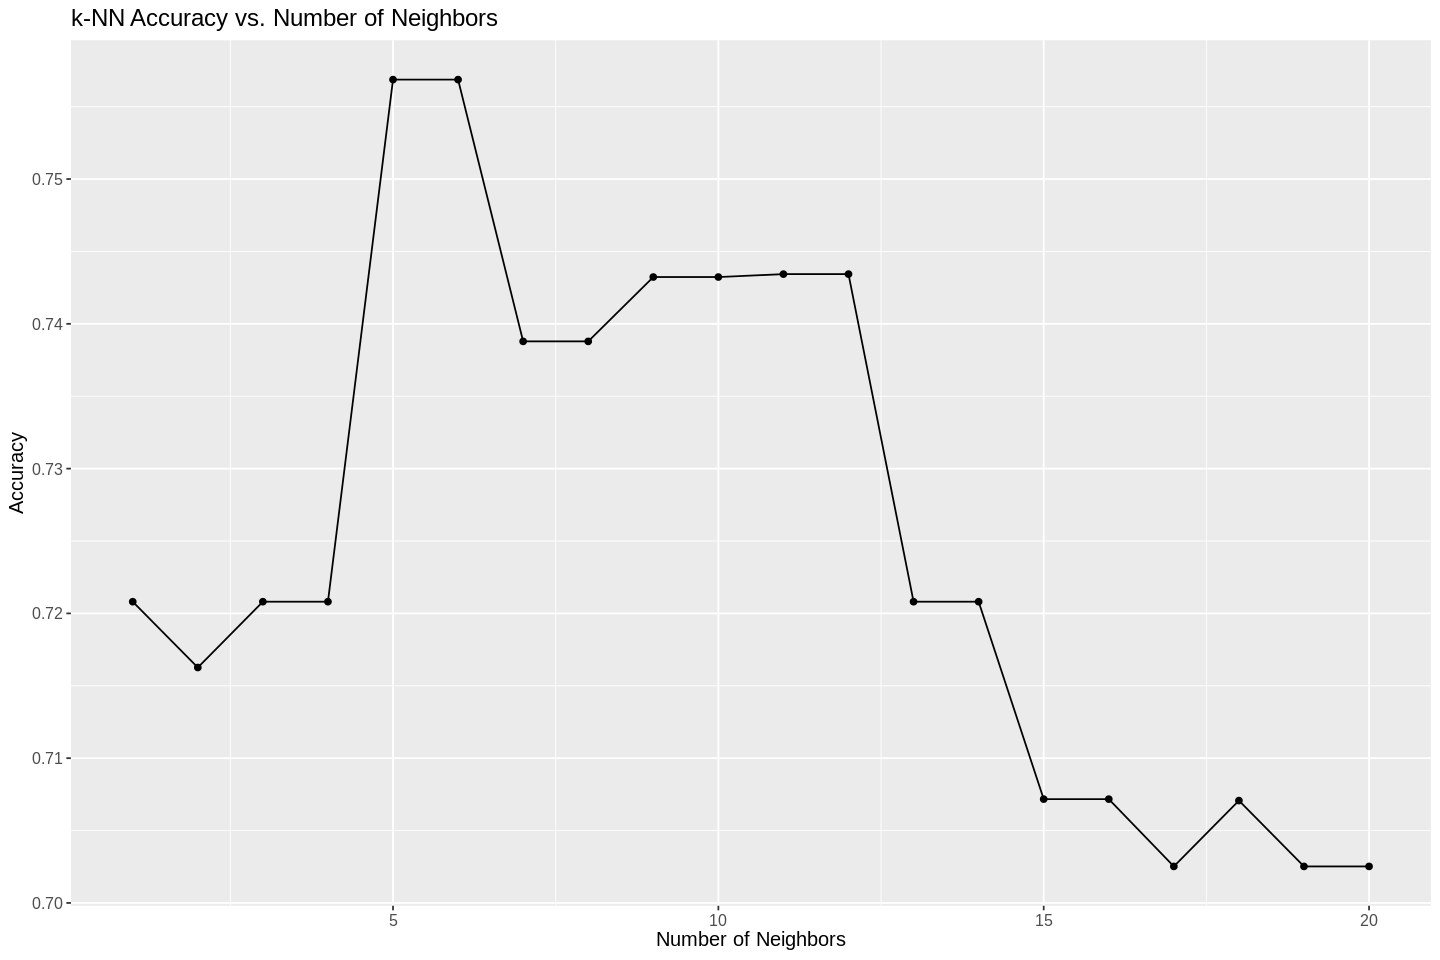

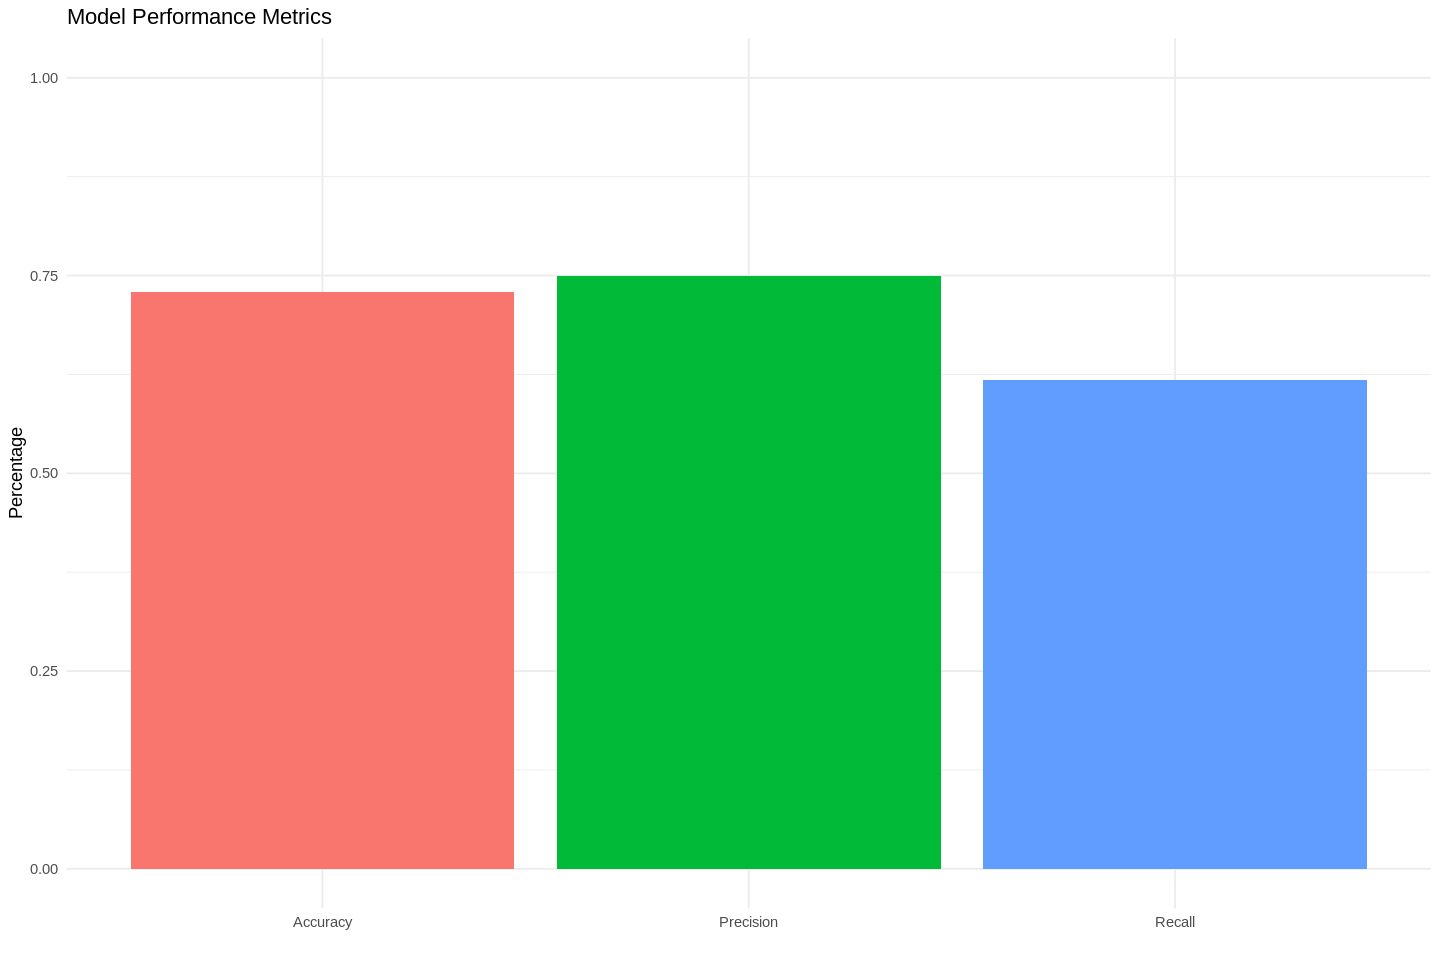

In [20]:

final_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")
final_knn_fit <- workflow() |>
  add_recipe(recipe(heart_disease_presence ~ ca + chol + oldpeak, data = cleveland_train)) |>
  add_model(final_knn_spec) |>
  fit(data = cleveland_train)
cleveland_predictions <- predict(final_knn_fit, cleveland_test) |>
  bind_cols(cleveland_test)
cleveland_conf_mat <- cleveland_predictions |>
  conf_mat(truth = heart_disease_presence, estimate = .pred_class)
cleveland_conf_mat
accuracy <- (33 + 21) / (33 + 13 + 7 + 21)
precision <- 21 / (21 + 7)
recall <- 21 / (21 + 13)
metrics_data <- data.frame(
  Metric = c("Accuracy", "Precision", "Recall"),
  Value = c(accuracy, precision, recall)
)
metrics_data
conf_bar <- ggplot(metrics_data, aes(x = Metric, y = Value, fill = Metric)) +
  geom_bar(stat = "identity") +
  labs(x = '', y = 'Percentage', title = 'Model Performance Metrics') +
  ylim(0, 1) +  
  theme_minimal() +
  theme(legend.position = "none")
conf_bar

## Methods:
The goal of this project is to build a model that can predict whether or not a patient has heart disease.
The model will use the K-nearest neighbors classification algorithm, as it is the most suitable method for the task; our data contains many variables, and we are trying to sort patients into two distinct categories. 

The data contains many variables, and not all of them can be used in the classification. The most relevant data can be characterized by:
- Being in numeric form (some categorical data could work)
- Moderate to strong correlations with heart disease

Additionally, as the model is being made to reduce the need for medical tests, variables that can be measured using simple and minimally invasive procedures are favoured (but this is not a priority).
To determine which variables should be prioritized, scatter plots between different variables can be used to find correlation strengths. 

We will use the K-nearest neighbors algorithm to analyze our data. Based on the preliminary data analysis, the data must be standardized and centered. Then, to determine the appropriate K value for our model, we will use cross-validation. To evaluate the performance of our model, we can use a confusion matrix and calculate the accuracy, precision and recall.
Additionally, to account for the fact that diseases behave differently in male and female bodies, we will make bar graphs to determine variability between sexes, and do some data analysis separated by sex.



## Expected Outcomes and Significance:

Elevated serum cholesterol heightens the risk of arterial plaque buildup, impeding blood flow and increasing the risk of clot formation. Elevated blood pressure impairs vessel elasticity, diminishing blood flow and augmenting heart disease susceptibility, manifesting as chest pain. Consequently, we anticipate finding relationships/ correlations between our 5 predictor variables and the presence or absence of heart disease. It is likely that factors like high serum cholesterol levels, resting blood pressure, and maximum heart rate achieved during exercise correlate positively with heart disease. This study harbours the potential for a cost-effective heart disease classification alternative. Furthermore, mitigating factors contributing to elevated serum cholesterol and blood pressure can enhance preventive measures against heart disease. Future inquiries could explore the interplay of various factors in heart disease diagnosis. For instance, “Are there specific age ranges where certain predictor variables exhibit a stronger association with the presence of heart disease?” and “Is there a sex difference where certain predictor variables exhibit a stronger association with the presence of heart disease?”
